# Meteorite project

In [1]:
import pandas as pd
meteorite=pd.read_csv('Meteorie.csv')

In [2]:
meteorite['fall'] = meteorite['fall'].replace({'Found':1,'Fell':0})

# Exclude all class except the top 5

In [3]:
final_data=meteorite.drop(columns=['GeoLocation','id','nametype','name'])
import pandas as pd

classes_to_be_kept = ['L6', 'H5', 'L5','H6','H4']

final_data = final_data[final_data['recclass'].isin(classes_to_be_kept)]
final_data = final_data.reset_index()
final_data=final_data.drop(columns=['index'])


In [4]:
value_counts = final_data['recclass'].value_counts()

# Dealing with nan values using SimpleImputer with mean strategy

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
 
imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
 
num_cols = ['mass (g)', 'year', 'reclat', 'reclong']
cat_col = ['recclass']
 
final_data[num_cols] = imputer_num.fit_transform(final_data[num_cols]) 
final_data[cat_col] = imputer_cat.fit_transform(final_data[cat_col])


In [6]:
print('Mass null value: ',final_data['mass (g)'].isnull().sum())
print('Year null value: ',final_data['year'].isnull().sum())
print('Latitude null value: ',final_data['reclat'].isnull().sum())
print('Longitude null value: ',final_data['reclong'].isnull().sum())
print('reclass null value: ',final_data['recclass'].isnull().sum())

Mass null value:  0
Year null value:  0
Latitude null value:  0
Longitude null value:  0
reclass null value:  0


# Dividing Data into X and Y

In [7]:
X = final_data.drop(columns=['fall']) 
Y = final_data['fall']

# Encoding reclass using OneHotEncoder

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_data = encoder.fit_transform(X[['recclass']])

# Get the feature names for the encoded columns
feature_names = encoder.get_feature_names_out(['recclass'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

train = pd.concat([X.reset_index(drop=True), encoded_df], axis=1)

X = train
X = X.drop(columns=['recclass'])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Scaling using StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std= scaler.fit_transform(X_train) 
y_std = Y_train.to_numpy()

# XGboost for fitting data

In [11]:
#pip install xgboost

In [12]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt


clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

# Prediction 

In [16]:
predictions_xgb = clf.predict(X_test)

accuracy = accuracy_score(Y_test, predictions_xgb)
print("Accuracy:", accuracy)

kappa_xgb = cohen_kappa_score(Y_test, predictions_xgb)
print("Cohen's Kappa:", kappa_xgb)


Accuracy: 0.9906784049715174
Cohen's Kappa: 0.7891426907490839


# Evaluation

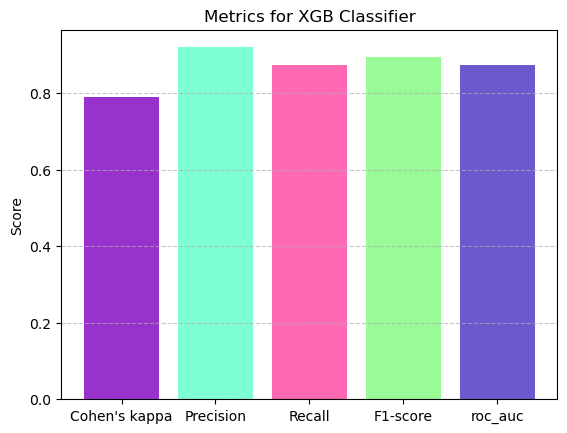

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, predictions_xgb)
precision = precision_score(Y_test, predictions_xgb, average='macro')
recall = recall_score(Y_test, predictions_xgb, average='macro')
f1 = f1_score(Y_test, predictions_xgb, average='macro')
conf_matrix = confusion_matrix(Y_test,predictions_xgb)
roc_auc = roc_auc_score(Y_test, predictions_xgb)
fpr, tpr, thresholds = roc_curve(Y_test,predictions_xgb)
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, predictions_xgb)

kappa_mlp = cohen_kappa_score(Y_test, predictions_xgb)

labels = ['Cohen\'s kappa', 'Precision', 'Recall', 'F1-score','roc_auc']
colors = ['darkorchid', 'aquamarine', 'hotpink', 'palegreen', 'slateblue']
values = [kappa_mlp, precision, recall, f1,roc_auc]
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(labels, values , color=colors)
plt.title('Metrics for XGB Classifier')
plt.ylabel('Score')
plt.show()